In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import csv

students = pd.read_csv(
    "/Users/aashishsukhija/Desktop/year2/python_project/students.csv",  quotechar='"', quoting=csv.QUOTE_MINIMAL)
#    sep=";",
 #   quotechar='"',
  #  quoting=csv.QUOTE_MINIMAL
    # quatotations in text values except numbers
    # seperator being used also appears in text panda wont be abel to load it.


print(students.head())

  sex  age famsize Pstatus     Mjob      Fjob guardian  studytime schoolsup  \
0   F   18     GT3       A  at_home   teacher   mother          2       yes   
1   F   17     GT3       T  at_home     other   father          2        no   
2   F   15     LE3       T  at_home     other   mother          2       yes   
3   F   15     GT3       T   health  services   mother          3        no   
4   F   16     GT3       T    other     other   father          2        no   

  famsup  ... activities internet romantic famrel  goout  Dalc  Walc  health  \
0     no  ...         no       no       no      4      4     1     1       3   
1    yes  ...         no      yes       no      5      3     1     1       3   
2     no  ...         no      yes       no      4      2     2     3       3   
3    yes  ...        yes      yes      yes      3      2     1     1       5   
4    yes  ...         no       no       no      4      2     1     2       5   

   absences  success  
0         6    False 

In [3]:
print(students.shape)
print(students.dtypes)

(349, 21)
sex           object
age            int64
famsize       object
Pstatus       object
Mjob          object
Fjob          object
guardian      object
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
internet      object
romantic      object
famrel         int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
success         bool
dtype: object


In [4]:
students = students.rename(columns={
    "Mjob": "Mother_Job",
    "Fjob": "Father_Job",
    "Pstatus": "Parent_Status",
    "famsize": "Family_Size",
    "studytime": "Study_Time",
    "schoolsup": "School_Support",
    "famsup": "Family_Support",
    "paid" : "Paid_classes",
    "famrel" : "Relationship_with_family",
    "goout": "Go_Out",
    "Dalc": "Daily_Alcohol",
    "Walc": "Weekend_Alcohol"
})

In [5]:
students["sex"] = students["sex"].replace({
    "M": "Male",
    "F": "Female"
})
students["Parent_Status"] = students["Parent_Status"].replace({
    "T": "living together",
    "A": "living apart"
})

students["Family_Size"] = students["Family_Size"].replace({
    "LE3" : "less or equal to 3",
    "GT3": "greater than 3"
})


In [6]:
# Question 1:
# What is the proportion of students that failed the class? 
# Proportion of failed students
fails = (students["success"] == False).sum()
total = len(students)
print(f"Failure rate: {fails / total * 100:.2f}%")

Failure rate: 32.38%


In [7]:
# Question 2:
# How are different variables (age, gender, internet access, family composition, etc.) distributed in the dataset?

In [8]:
categorical_cols = ["sex","Family_Size","Parent_Status","Mother_Job","Father_Job","guardian","School_Support","Family_Support","Paid_classes","activities","internet","romantic","success"]

numeric_cols = ["age","Study_Time","Relationship_with_family","Go_Out","Daily_Alcohol","Weekend_Alcohol","health","absences"]

In [ ]:
numeric_summary = students[numeric_cols].agg(['mean', 'median', 'min', 'max']).T.round(2)
numeric_summary.to_latex("numeric_summary.tex", index=True, caption="Descriptive Statistics of Numeric Variables", label="tab:numeric_summary") # latex save
numeric_summary


,mean,median,min,max
age,16.52,16.0,15.0,22.0
Study_Time,2.06,2.0,1.0,4.0
Relationship_with_family,3.96,4.0,1.0,5.0
Go_Out,3.11,3.0,1.0,5.0
Daily_Alcohol,1.44,1.0,1.0,5.0
Weekend_Alcohol,2.26,2.0,1.0,5.0
health,3.58,4.0,1.0,5.0
absences,5.97,4.0,0.0,75.0


In [10]:
categorical_summary = pd.DataFrame({
    'Unique Values': [students[col].nunique() for col in categorical_cols],
    'Most Frequent': [students[col].mode()[0] for col in categorical_cols],
    'Frequency (%) of the Most Frequent': [
        round(students[col].value_counts(normalize=True).iloc[0] * 100, 2)
        for col in categorical_cols
    ]
}, index=categorical_cols)

categorical_summary

,Unique Values,Most Frequent,Frequency (%) of the Most Frequent
sex,2,Female,52.44
Family_Size,2,greater than 3,72.21
Parent_Status,2,living together,89.11
Mother_Job,5,other,34.96
Father_Job,5,other,56.16
guardian,3,mother,70.20
School_Support,2,no,85.39
Family_Support,2,yes,64.18
Paid_classes,2,no,53.87
activities,2,yes,53.01


In [11]:
# Demographic & Background Variables

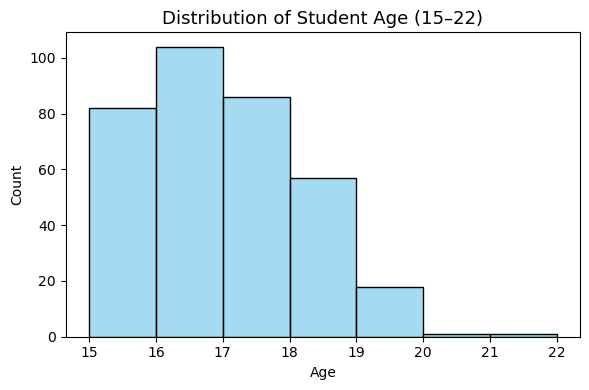

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=students,x="age", bins=range(15, 23), color="skyblue", edgecolor="black")
plt.title("Distribution of Student Age (15–22)", fontsize=13)
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("gender_distribution.pdf", format="pdf", bbox_inches="tight") # pdf save
plt.show()

/var/folders/sh/706c5bx96g36pfp_h97vt_3r0000gn/T/ipykernel_16292/273796478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students, x="sex", palette=["#8ecae6", "#f4a261"])


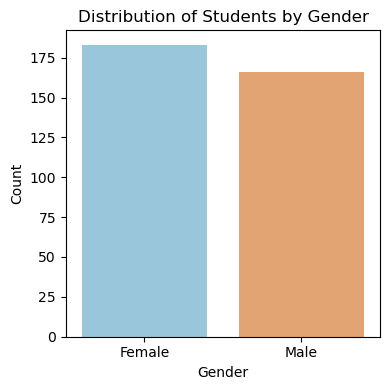

In [13]:
plt.figure(figsize=(4, 4))
sns.countplot(data=students, x="sex", palette=["#8ecae6", "#f4a261"])
plt.title("Distribution of Students by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

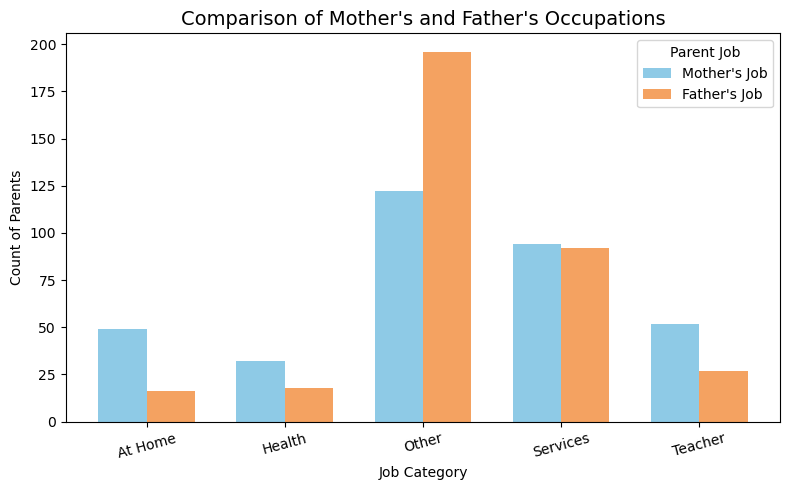

In [14]:
# Prepare counts for each category
mother_counts = students["Mother_Job"].value_counts().reindex(
    ["at_home", "health", "other", "services", "teacher"], fill_value=0
)
father_counts = students["Father_Job"].value_counts().reindex(
    ["at_home", "health", "other", "services", "teacher"], fill_value=0
)

# Define x positions and bar width
x = np.arange(len(mother_counts))
width = 0.35

# Plot bars side by side
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, mother_counts, width, color="#8ecae6", label="Mother's Job")
plt.bar(x + width/2, father_counts, width, color="#f4a261", label="Father's Job")

# Relabeled tick names for clarity
display_labels = ["At Home", "Health", "Other", "Services", "Teacher"]
plt.xticks(x, display_labels, rotation=15)

# Aesthetic details
plt.xlabel("Job Category")
plt.ylabel("Count of Parents")
plt.title("Comparison of Mother's and Father's Occupations", fontsize=14)
plt.legend(title="Parent Job")
plt.tight_layout()
plt.show()

In [15]:
# Academic Engagement Variables

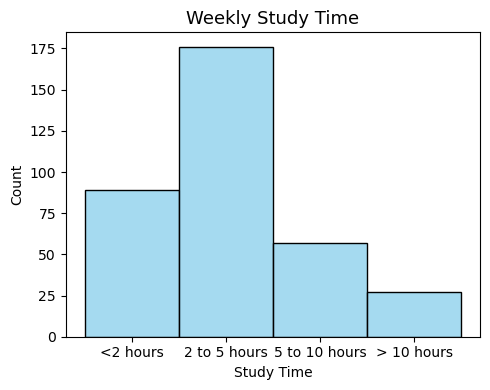

In [16]:
plt.figure(figsize=(5, 4))
ax = sns.histplot(
    data=students,
    x="Study_Time",
    bins=range(1, 6),  # 1 to 4 inclusive
    color="skyblue",
    edgecolor="black"
)
# Set custom labels for numeric categories
ax.set_xticks([1.5, 2.5, 3.5, 4.5])
ax.set_xticklabels(["<2 hours", "2 to 5 hours", "5 to 10 hours", "> 10 hours"])

plt.title("Weekly Study Time", fontsize=13)
plt.xlabel("Study Time")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

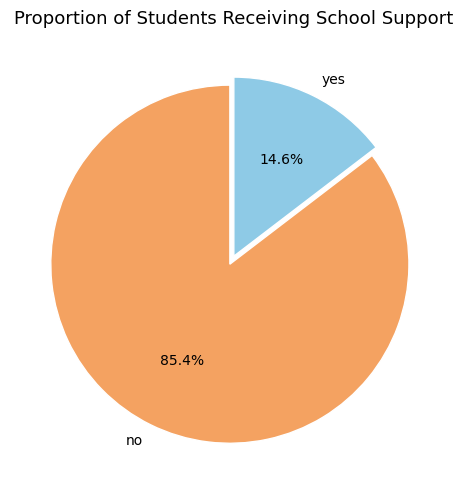

In [43]:
# Count the categories
support_counts = students["School_Support"].value_counts()

colors = ["#8ecae6" if label == "yes" else "#f4a261" for label in support_counts.index]

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students Receiving School Support", fontsize=13)
plt.tight_layout()
plt.show()

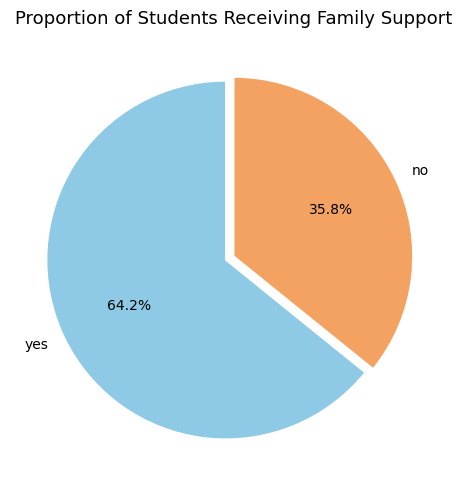

In [44]:
# Count the categories
support_counts = students["Family_Support"].value_counts()

colors = ["#8ecae6" if label == "yes" else "#f4a261" for label in support_counts.index]

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students Receiving Family Support", fontsize=13)
plt.tight_layout()
plt.show()

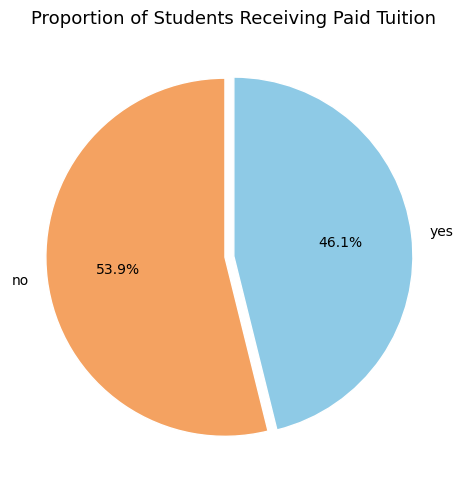

In [45]:
# Count the categories
support_counts = students["Paid_classes"].value_counts()
colors = ["#8ecae6" if label == "yes" else "#f4a261" for label in support_counts.index]

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students Receiving Paid Tuition", fontsize=13)
plt.tight_layout()
plt.show()

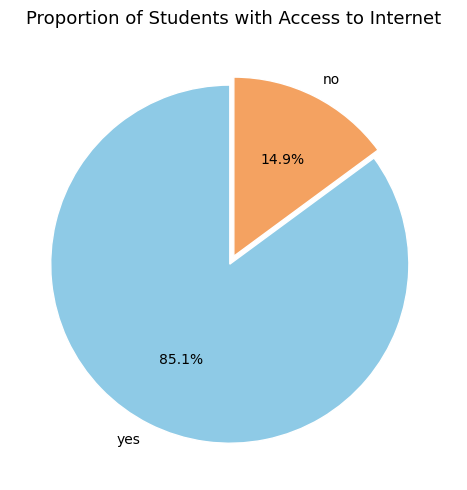

In [46]:
# Count the categories
support_counts = students["internet"].value_counts()
colors = ["#8ecae6" if label == "yes" else "#f4a261" for label in support_counts.index]

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students with Access to Internet", fontsize=13)
plt.tight_layout()
plt.show()

In [21]:
# Social & Lifestyle Variables; activities and romance, write about them from the table
# Health & Well-being Variables

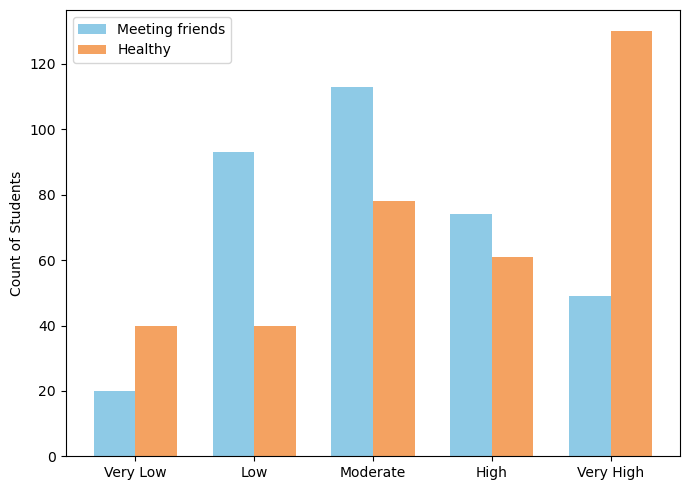

In [22]:
# Prepare data
out_counts = students["Go_Out"].value_counts().sort_index()
health_counts = students["health"].value_counts().sort_index()

# Define x positions and bar width
x = np.arange(1, 6)  # 1 to 5 levels
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, out_counts, width, color="#8ecae6", label="Meeting friends")
plt.bar(x + width/2, health_counts, width, color="#f4a261", label="Healthy")

# Customize
plt.xticks(x, ["Very Low", "Low", "Moderate", "High", "Very High"])
plt.xlabel("")
plt.ylabel("Count of Students")
plt.title("", fontsize=14)
plt.legend(title="")
plt.tight_layout()
plt.show()
# maybe they cannot concentrate more when there health is not best, but they dont go outwhen is better, they study nmore at at home using. lets see with health and no of hours

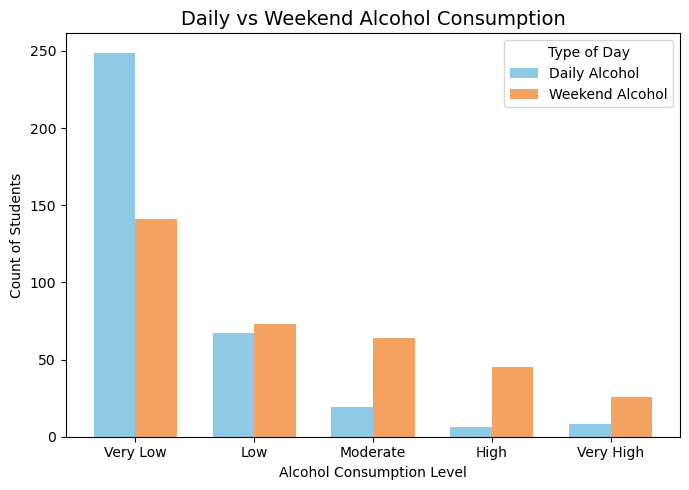

In [23]:
# Prepare data
daily_counts = students["Daily_Alcohol"].value_counts().sort_index()
weekend_counts = students["Weekend_Alcohol"].value_counts().sort_index()

# Define x positions and bar width
x = np.arange(1, 6)  # 1 to 5 levels
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, daily_counts, width, color="#8ecae6", label="Daily Alcohol")
plt.bar(x + width/2, weekend_counts, width, color="#f4a261", label="Weekend Alcohol")

# Customize
plt.xticks(x, ["Very Low", "Low", "Moderate", "High", "Very High"])
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Count of Students")
plt.title("Daily vs Weekend Alcohol Consumption", fontsize=14)
plt.legend(title="Type of Day")
plt.tight_layout()
plt.show()

In [24]:
numeric_cols = ["age","Study_Time","Relationship_with_family","Go_Out","Daily_Alcohol","Weekend_Alcohol","health","absences"]

In [25]:
# How do variables interact with each other?
# 1. Are age, absences, family composition, etc. distributed similarly for both genders?
# 2. What are the age, gender, internet access, alcohol consumption, etc. distributions by parents cohabitation status?
# ...
# etc..

In [26]:
# 1. Are age, absences, family composition, etc. distributed similarly for both genders?

In [27]:
# Variables to include
vars_to_summarize = [
    "age", "absences", "Go_Out", "Weekend_Alcohol", "Daily_Alcohol",
    "Relationship_with_family", "Study_Time",
    "School_Support", "Family_Support", "Paid_classes",
    "activities", "internet", "romantic", "success"
]

# Separate numeric and categorical variables
numeric_vars = [
    "age", "absences", "Go_Out", "Weekend_Alcohol", "Daily_Alcohol",
    "Relationship_with_family", "Study_Time"
]

categorical_vars = [
    "School_Support", "Family_Support", "Paid_classes",
    "activities", "internet", "romantic", "success"
]

# Initialize summary DataFrame
summary_by_gender = pd.DataFrame(index=vars_to_summarize)

# Calculate means for numeric variables by gender
for var in numeric_vars:
    summary_by_gender.loc[var, "Male"] = students.loc[students["sex"] == "Male", var].mean()
    summary_by_gender.loc[var, "Female"] = students.loc[students["sex"] == "Female", var].mean()

# Calculate percentage of "yes" or True for categorical variables by gender
for var in categorical_vars:
    summary_by_gender.loc[var, "Male"] = (
        students.loc[students["sex"] == "Male", var].isin(["yes", True]).mean() * 100
    )
    summary_by_gender.loc[var, "Female"] = (
        students.loc[students["sex"] == "Female", var].isin(["yes", True]).mean() * 100
    )

# Round results to 2 decimals
summary_by_gender = summary_by_gender.round(2)

# Display final summary
summary_by_gender

,Male,Female
age,16.46,16.58
absences,5.22,6.64
Go_Out,3.18,3.05
Weekend_Alcohol,2.60,1.96
Daily_Alcohol,1.66,1.25
Relationship_with_family,4.02,3.90
Study_Time,1.80,2.30
School_Support,9.04,19.67
Family_Support,56.02,71.58
Paid_classes,39.16,52.46


In [28]:
# 2. What are the age, gender, internet access, alcohol consumption, guardian etc. distributions by parents cohabitation status?


In [29]:
# Variables to include
vars_to_summarize = [
    "guardian", "Study_Time", "health",
    "Family_Support", "Daily_Alcohol", "Weekend_Alcohol",
    "Relationship_with_family", "romantic", "absences", "success"
]

# Separate numeric and categorical variables
numeric_vars = [
    "Study_Time", "health", "Daily_Alcohol",
    "Weekend_Alcohol", "Relationship_with_family", "absences"
]

# Variables for proportions (%)
proportion_vars = ["Family_Support", "romantic", "success"]

# Initialize table
summary_by_parent_status = pd.DataFrame(index=vars_to_summarize)

# Compute mean values for numeric variables by Parent_Status
for var in numeric_vars:
    summary_by_parent_status.loc[var, "Living Together"] = students.loc[
        students["Parent_Status"] == "living together", var
    ].mean()
    summary_by_parent_status.loc[var, "Living Apart"] = students.loc[
        students["Parent_Status"] == "living apart", var
    ].mean()

# Compute proportions (%) for selected categorical variables
for var in proportion_vars:
    summary_by_parent_status.loc[var, "Living Together"] = (
        students.loc[students["Parent_Status"] == "living together", var]
        .isin(["yes", True]).mean() * 100
    )
    summary_by_parent_status.loc[var, "Living Apart"] = (
        students.loc[students["Parent_Status"] == "living apart", var]
        .isin(["yes", True]).mean() * 100
    )

# Compute most frequent category for 'guardian'
summary_by_parent_status.loc["guardian", "Living Together"] = students.loc[
    students["Parent_Status"] == "living together", "guardian"
].mode()[0]
summary_by_parent_status.loc["guardian", "Living Apart"] = students.loc[
    students["Parent_Status"] == "living apart", "guardian"
].mode()[0]

# Round numeric results to 2 decimals
summary_by_parent_status = summary_by_parent_status.round(2)

# Display the final summary
summary_by_parent_status

/var/folders/sh/706c5bx96g36pfp_h97vt_3r0000gn/T/ipykernel_16292/3916929396.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mother' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_by_parent_status.loc["guardian", "Living Together"] = students.loc[
/var/folders/sh/706c5bx96g36pfp_h97vt_3r0000gn/T/ipykernel_16292/3916929396.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mother' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_by_parent_status.loc["guardian", "Living Apart"] = students.loc[


,Living Together,Living Apart
guardian,mother,mother
Study_Time,2.073955,1.973684
health,3.601286,3.368421
Family_Support,64.630225,60.526316
Daily_Alcohol,1.434084,1.526316
Weekend_Alcohol,2.273312,2.157895
Relationship_with_family,3.96463,3.921053
romantic,31.832797,36.842105
absences,5.565916,9.236842
success,66.881029,73.684211


In [30]:
# 3. Parental Job Type vs Student Success

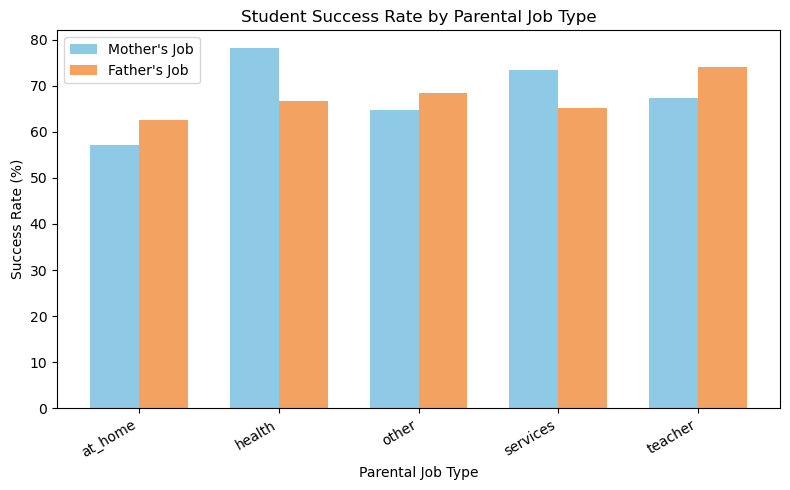

In [47]:
# Compute success rates (or counts) by parental job type
mother_success = (
    students.groupby("Mother_Job")["success"]
    .apply(lambda x: x.isin(["yes", True]).mean() * 100)
    .reset_index()
    .rename(columns={"success": "Success_Rate"})
)

father_success = (
    students.groupby("Father_Job")["success"]
    .apply(lambda x: x.isin(["yes", True]).mean() * 100)
    .reset_index()
    .rename(columns={"success": "Success_Rate"})
)

# Create figure and axes
plt.figure(figsize=(8, 5))

# Bar width and positions
x = range(len(mother_success))
width = 0.35

# Plot both bars side by side
plt.bar(
    [i - width/2 for i in x],
    mother_success["Success_Rate"],
    width=width,
    label="Mother's Job",
    color="#8ecae6"
)
plt.bar(
    [i + width/2 for i in x],
    father_success["Success_Rate"],
    width=width,
    label="Father's Job",
    color="#f4a261"
)

# Customize chart
plt.xticks(ticks=x, labels=mother_success["Mother_Job"], rotation=30, ha="right")
plt.xlabel("Parental Job Type")
plt.ylabel("Success Rate (%)")
plt.title("Student Success Rate by Parental Job Type")
plt.legend(title="")
plt.tight_layout()
plt.show()

In [32]:
# 4. “Do students who study more hours per week also show better health, fewer absences, stronger family relationships, and higher success rates — and does their alcohol consumption or social activity differ?”

In [55]:
# Variables to summarize
vars_to_summarize = [
    "health", "Daily_Alcohol", "Weekend_Alcohol",
    "absences", "Relationship_with_family", "Go_Out", "success"
]

# Separate numeric and categorical variables
numeric_vars = [
    "health", "Daily_Alcohol", "Weekend_Alcohol",
    "absences", "Relationship_with_family", "Go_Out"
]

categorical_vars = ["success"]

# Compute mean for numeric variables by Study_Time
numeric_summary = (
    students.groupby("Study_Time")[numeric_vars]
    .mean()
    .round(2)
)

# Compute proportion (%) of "yes" for categorical variable (success)
success_summary = (
    students.groupby("Study_Time")["success"]
    .apply(lambda x: x.isin(["yes", True]).mean() * 100)
    .round(2)
)

# Combine both results into one DataFrame
count_summary = students.groupby("Study_Time")["success"].count()

summary_by_studytime = numeric_summary.copy()
summary_by_studytime["success (%)"] = success_summary
summary_by_studytime["count"] = count_summary


# Label the study time categories
summary_by_studytime.index = ["<2 hours", "2–5 hours", "5–10 hours", ">10 hours"]

# Transpose to make columns the study time categories
summary_by_studytime = summary_by_studytime.T # (transposed for column)

# Display final summary
summary_by_studytime #  cross-tabulation table

,<2 hours,2–5 hours,5–10 hours,>10 hours
health,3.83,3.45,3.74,3.19
Daily_Alcohol,1.67,1.43,1.21,1.30
Weekend_Alcohol,2.72,2.24,1.84,1.78
absences,5.91,6.62,4.89,4.15
Relationship_with_family,3.89,3.98,4.11,3.78
Go_Out,3.16,3.16,2.93,3.00
success (%),69.66,63.64,73.68,74.07
count,89.00,176.00,57.00,27.00


In [34]:
# 5. Heatmap

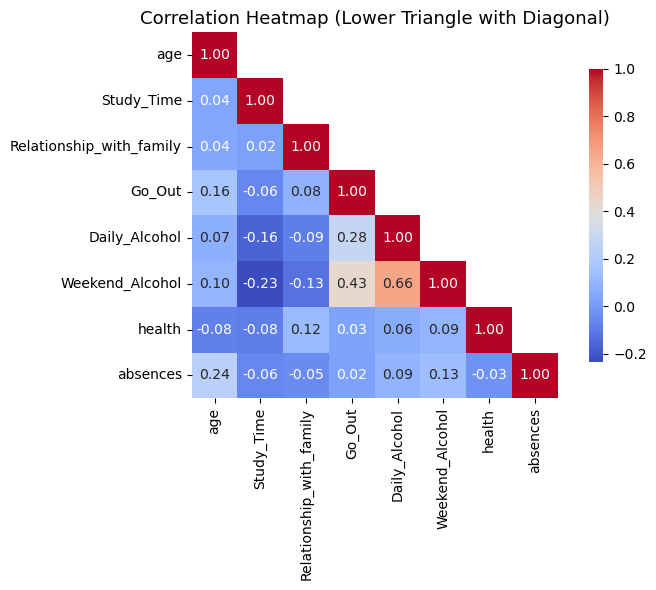

In [35]:
# Compute correlation matrix
corr = students.select_dtypes(include=['number']).corr()
# Create a mask for the upper triangle — but keep the diagonal visible
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # k=1 hides only upper triangle

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
    square=True, cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Lower Triangle with Diagonal)", fontsize=13)
plt.tight_layout()
plt.show()

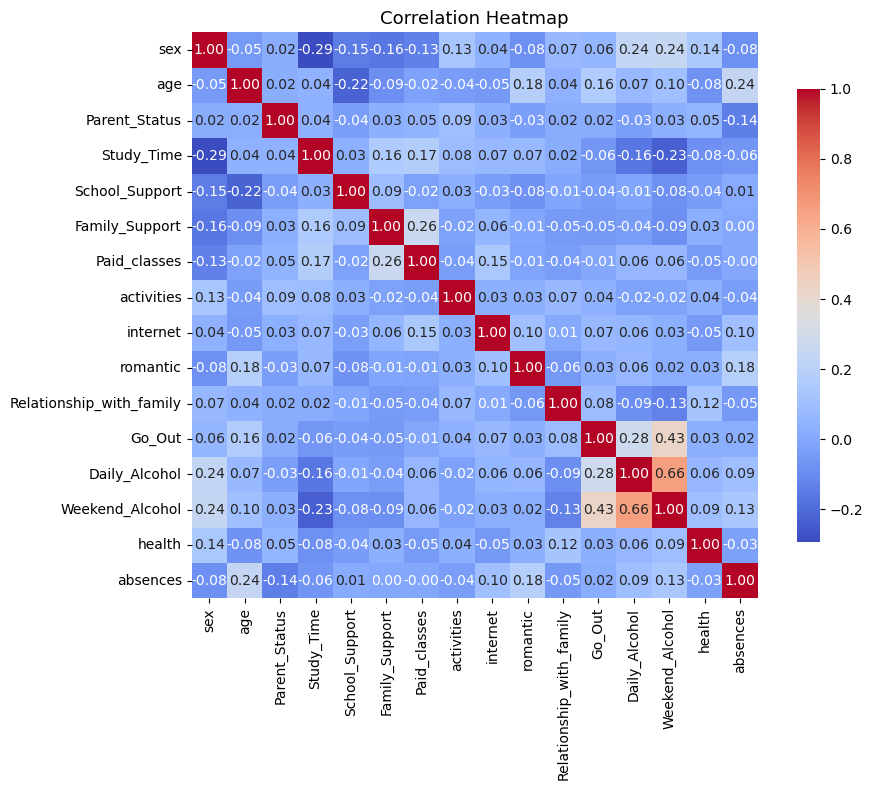

In [57]:
# Make a copy and encode binary variables
students_corr = students.copy()
binary_map = {
    "yes": 1, "no": 0, True: 1, False: 0,
    "Male": 1, "Female": 0,
    "living together": 1, "living apart": 0
}
binary_vars = ["School_Support", "Family_Support", "Paid_classes",
               "activities", "internet", "romantic", "sex", "Parent_Status"]
students_corr[binary_vars] = students_corr[binary_vars].replace(binary_map)

# Compute correlation matrix
corr = students_corr.select_dtypes(include="number").corr()

# Full heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=13)
plt.tight_layout()
plt.show()

In [41]:
# success result by factors. a lot of vars are not significant.

In [58]:
# Variables to include
vars_to_summarize = [
    "Family_Size", "guardian", "Parent_Status", "Family_Support",
    "Relationship_with_family", "Study_Time", "Daily_Alcohol",
    "Weekend_Alcohol", "Go_Out", "health", "absences"
]

# Separate variable types
categorical_vars = ["Family_Size", "guardian", "Parent_Status"]
binary_vars = ["Family_Support"]
numeric_vars = [
    "Relationship_with_family", "Study_Time", "Daily_Alcohol",
    "Weekend_Alcohol", "Go_Out", "health", "absences"
]

# Initialize table
summary_by_success = pd.DataFrame(index=vars_to_summarize)

# Most frequent category for categorical variables
for var in categorical_vars:
    summary_by_success.loc[var, "Passed"] = students.loc[students["success"] == True, var].mode()[0]
    summary_by_success.loc[var, "Failed"] = students.loc[students["success"] == False, var].mode()[0]

# Proportion (%) of “yes” for binary Family_Support
for var in binary_vars:
    summary_by_success.loc[var, "Passed"] = (
        students.loc[students["success"] == True, var].isin(["yes", True]).mean() * 100
    )
    summary_by_success.loc[var, "Failed"] = (
        students.loc[students["success"] == False, var].isin(["yes", True]).mean() * 100
    )

# Mean for numeric variables
for var in numeric_vars:
    summary_by_success.loc[var, "Passed"] = students.loc[students["success"] == True, var].mean()
    summary_by_success.loc[var, "Failed"] = students.loc[students["success"] == False, var].mean()

# Round numeric values
summary_by_success = summary_by_success.round(2)

# Display
summary_by_success

,Passed,Failed
Family_Size,greater than 3,greater than 3
guardian,mother,mother
Parent_Status,living together,living together
Family_Support,61.440678,69.911504
Relationship_with_family,4.008475,3.858407
Study_Time,2.084746,2.017699
Daily_Alcohol,1.419492,1.495575
Weekend_Alcohol,2.228814,2.327434
Go_Out,2.944915,3.460177
health,3.516949,3.699115


In [ ]:
# extra question, interestig to look at, does paid classes increase succes rate *** to changhe
# import pandas as pd

# Step 1: Create a filtered summary table
support_summary = (
    students
    .groupby(["Paid_classes", "Family_Support", "School_Support"])
    .agg(
        total_students=("success", "count"),
        pass_rate=("success", lambda x: x.isin(["yes", True]).mean() * 100)
    )
    .reset_index()
    .sort_values("pass_rate", ascending=False)
)

# Step 2: Display summary
support_summary.round(2) 